###### using EnsembleVoteClassifier of MLXTEND

pip install mlxtend


In [1]:
import numpy as np
from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier

from mlxtend.classifier import EnsembleVoteClassifier

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score

In [2]:
# load iris data
iris = datasets.load_iris()

X, y = iris.data[:, 1:3], iris.target

In [3]:
# define the base estimators
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GaussianNB()

#### logistic regression
solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’.
Algorithm to use in the optimization problem.

- For small datasets, ‘liblinear’ is a good choice, 
- whereas ‘sag’ and ‘saga’ are faster for large ones.
- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; 
- ‘liblinear’ is limited to one-versus-rest schemes.
- ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.

#### Run the base estimators - individually

- __cross_val_score__ only supports 1 scoring attribute at a time
- __cross_validate__ supports multiple scoring attributes

In [4]:
np.set_printoptions(precision=2)

print('5-fold cross validation:\n')

labels  = ['Logistic Regression', 'Random Forest', 'Naive Bayes']
scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']

for clf, label in zip([clf1, clf2, clf3], labels):
    print('Estimator : ', label)
    
    # scores = cross_val_score(clf, X, y, cv=5, scoring='accuray')
    # print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
    scores = cross_validate(clf, X, y, cv=5, scoring=scoring, return_train_score=True, return_estimator=True)
    
    #print(scores.keys())
    print('  Training accuracy : ', scores['train_accuracy'], ' mean : ', round(scores['train_accuracy'].mean(), 2))
    print('  testing  accuracy : ', scores['test_accuracy'] , ' mean : ', round(scores['test_accuracy'].mean(),2 ))
        

5-fold cross validation:

Estimator :  Logistic Regression
  Training accuracy :  [0.96 0.94 0.97 0.96 0.93]  mean :  0.95
  testing  accuracy :  [0.93 1.   0.9  0.93 1.  ]  mean :  0.95
Estimator :  Random Forest
  Training accuracy :  [0.98 0.98 0.99 0.99 0.98]  mean :  0.99
  testing  accuracy :  [0.93 1.   0.9  0.9  0.97]  mean :  0.94
Estimator :  Naive Bayes
  Training accuracy :  [0.93 0.92 0.95 0.91 0.92]  mean :  0.92
  testing  accuracy :  [0.87 0.93 0.87 0.93 0.97]  mean :  0.91


In [ ]:
#predicted = cross_val_predict(clf, iris.data, iris.target, cv=10)

In [5]:
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1, 1, 1])

# scores = cross_val_score(eclf, X, y, cv=5, scoring='accuracy')
# print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

scores = cross_validate(eclf, X, y, cv=5, scoring=scoring, return_train_score=True, return_estimator=True)
    
#print(scores.keys())
print(' Training accuracy : ', scores['train_accuracy'], ' mean : ', round(scores['train_accuracy'].mean(), 2))
print(' testing  accuracy : ', scores['test_accuracy'] , ' mean : ', round(scores['test_accuracy'].mean(),2 ))

 Training accuracy :  [0.97 0.96 0.97 0.97 0.95]  mean :  0.96
 testing  accuracy :  [0.93 1.   0.9  0.93 1.  ]  mean :  0.95


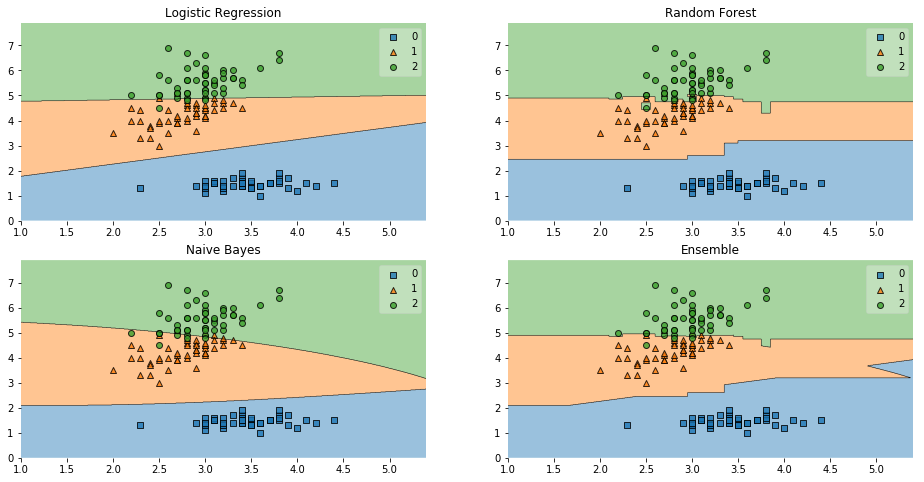

In [6]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16, 8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    
    plt.title(lab)

plt.show()